In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Iris**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/iris.csv')
print(df.head())
df["species"].unique()

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [ ]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [ ]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy Score: 1.0


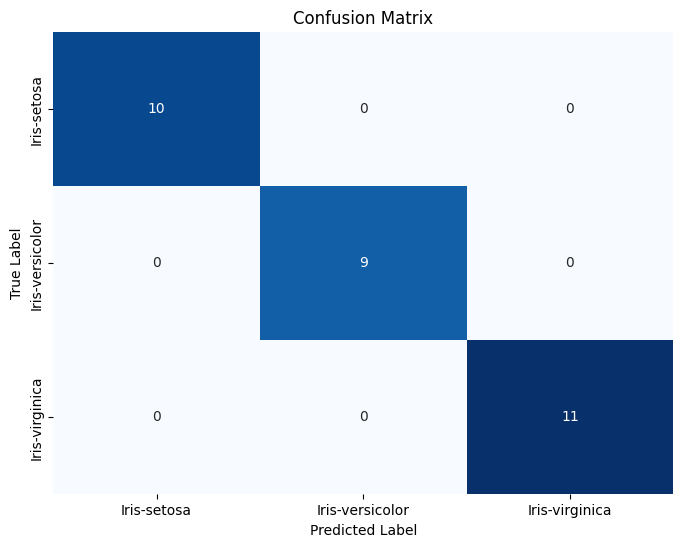

In [ ]:
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_matrix_df = pd.DataFrame(confusion_mat,
                               index=class_names,
                               columns=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

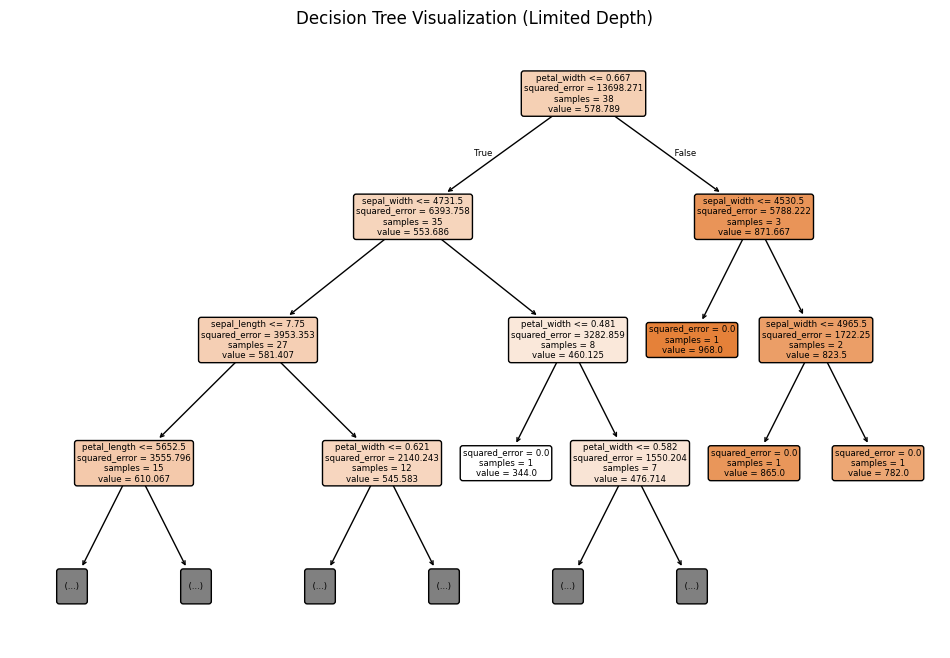

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True,max_depth=3)
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()

**Drugdataset**

In [ ]:
df=pd.read_csv('/content/drug.csv')
print(df.head())
print(df["Drug"].unique())
print(df['Sex'].unique())
print(df['BP'].unique())
print(df['Cholesterol'].unique())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
['drugY' 'drugC' 'drugX' 'drugA' 'drugB']
['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


In [ ]:
label_encoders={}
for column in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

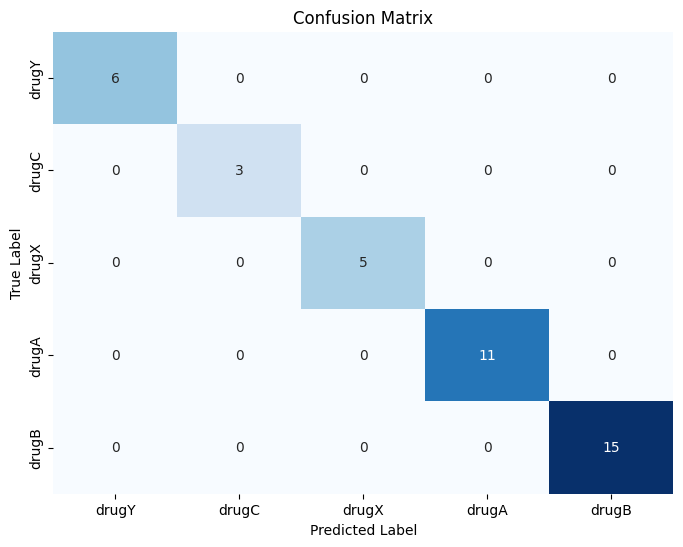

In [ ]:
y_pred = classifier.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)


class_names = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
conf_matrix_df = pd.DataFrame(confusion_mat,
                               index=class_names[:len(confusion_mat)],
                               columns=class_names[:len(confusion_mat)])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

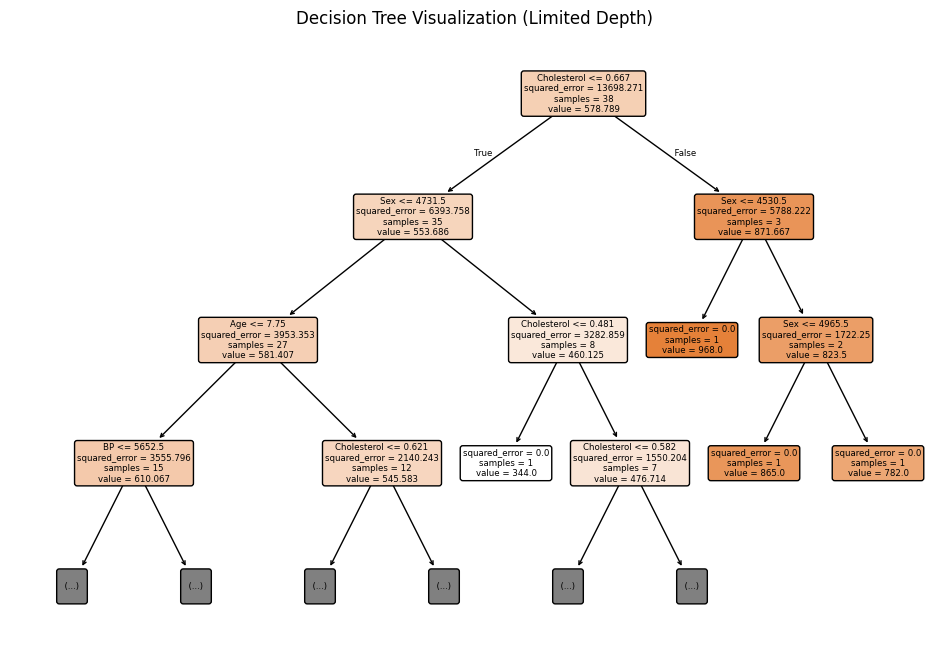

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()

**petrol_consumption**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree


In [ ]:
df=pd.read_csv("/content/petrol_consumption.csv")
print(df.head())

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  


In [ ]:
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Without changing hyperparameters")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Without changing hyperparameters
Mean Absolute Error: 94.30
Mean Squared Error: 17347.70
Root Mean Squared Error: 131.71


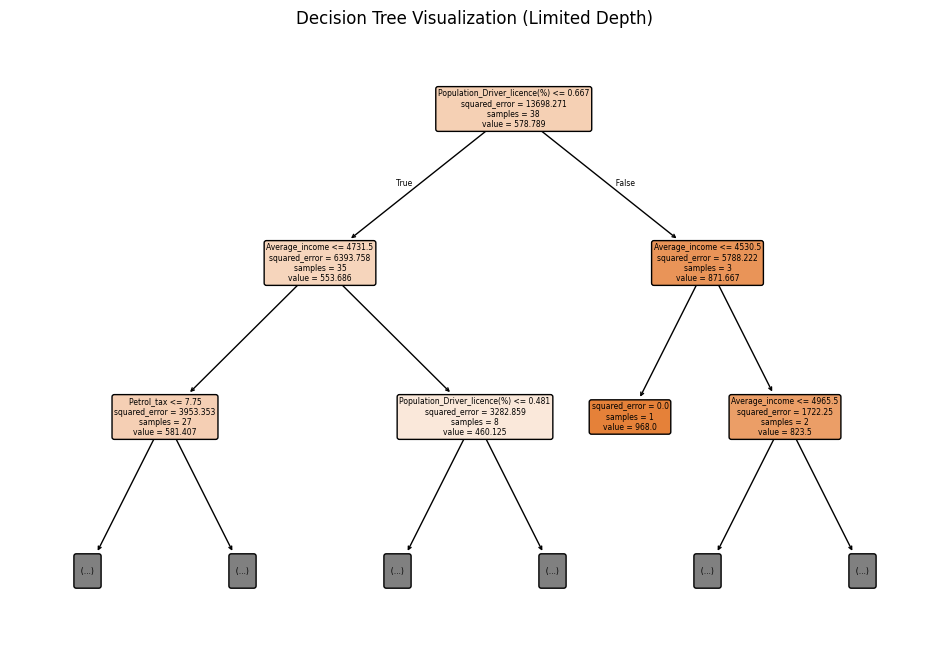

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, max_depth=2)
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42)

In [ ]:
y_pred = best_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("After changing hyperparameters")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

After changing hyperparameters
Mean Absolute Error: 70.12
Mean Squared Error: 6918.00
Root Mean Squared Error: 83.17
